# Практическое задание №4

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import warnings
warnings.filterwarnings('ignore')

В файле laptops_na.csv" содержаться следующие переменные:

- `"brand"` : Название бренда ноутбука.
- `"Model"` : Конкретная модель или серия ноутбука.
- `"Price"` : Цена ноутбука в индийских рупиях.
- `"Rating"` : Рейтинг, присвоенный ноутбуку на основе его характеристик.
- `"processor_brand"` : Марка процессора, используемого в ноутбуке.
- `"processor_tier"` : Уровень производительности или категория процессора.
- `"num_cores"` : Количество вычислительных ядер в процессоре.
- `"num_threads"` : Количество потоков, поддерживаемых процессором.
- `"ram_memory"` : Объем оперативной памяти, используемый в ноутбуке.
- `"primary_storage_type"` : Тип основного хранилища (например, HDD, SSD).
- `"primary_storage -apacity"` : Емкость основного хранилища ноутбука.
- `"secondary_storage_type"` : Тип вторичного хранилища, если оно доступно.
- `"secondary_storage_capacity"` : Емкость вторичного хранилища ноутбука.
- `"gpu_brand"` : Марка графического процессора (GPU).
- `"gpu_type"` : Тип графического процессора.
- `"is_touch_screen"` : Указывает, оснащен ли ноутбук функцией сенсорного экрана.
- `"display_size"` : Размер дисплея ноутбука в дюймах.
- `"resolution_width"` : Разрешение по ширине дисплея.
- `"resolution_height"` : Разрешение дисплея по высоте.
- `"OS"` : Установленная на ноутбуке операционная система.
- `"year_of_warranty"` : Срок гарантии, предоставляемой на ноутбук, обычно в годах.



Задания:

    •	Постройте модель множественной линейной регрессии. Зависимая переменная - Price. Выберите не менее 7-ми переменных в качестве независимых. Среди независимых переменных должно быть не менее 2 категориальных.
    
    •	Сформулируйте гипотезы исследования.
    
    •	Напишите уравнение регрессии. 
    
    •	Оцените характеристики регрессионной модели в целом. 
    
    •	Оцените значимость регрессионных коэффициентов. Сравните их между собой по силе взаимосвязи с зависимой переменной. 
    
    •	Подробно интерпретируйте особенности взаимосвязи между каждым из предикторов и зависимой переменной. Это очень важный пункт задания, поскольку именно в нем мы делаем выводы о том, какие факторы и как могут влиять на цену ноутбуков!
    
    •	Проведите диагностику модели. Есть ли в модели выбросы и/или влияющие наблюдения? Чем это может объясняться?
    
    •	Сформулируйте общие содержательные выводы по результатам регрессионного анализа данных. Какие результаты анализа данных для вас оказались очевидными, а какие неожиданными?

In [3]:
df = pd.read_csv("laptops_na.csv")
df

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,1.0,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990.0,63.0,intel,core i3,2.0,4.0,NaN,...,No secondary storage,0.0,intel,integrated,False,15.6,1920.0,1080.0,windows,1
1,2.0,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990.0,67.0,intel,core i7,4.0,8.0,16.0,...,No secondary storage,0.0,intel,integrated,False,15.6,1920.0,1080.0,windows,1
2,3.0,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100.0,73.0,amd,ryzen 5,6.0,12.0,8.0,...,No secondary storage,0.0,amd,dedicated,False,NaN,1920.0,1080.0,windows,1
3,4.0,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990.0,62.0,intel,core i5,12.0,NaN,8.0,...,No secondary storage,0.0,intel,integrated,False,14.0,1920.0,1080.0,windows,1
4,5.0,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580.0,62.0,amd,ryzen 3,4.0,8.0,8.0,...,No secondary storage,0.0,amd,integrated,False,15.6,1920.0,1080.0,windows,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,998.0,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,65990.0,68.0,amd,ryzen 5,6.0,12.0,16.0,...,No secondary storage,0.0,nvidia,dedicated,False,15.6,1920.0,1080.0,windows,1
987,999.0,NaN,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,91990.0,73.0,intel,core i7,10.0,16.0,16.0,...,No secondary storage,0.0,nvidia,NaN,False,NaN,NaN,1080.0,windows,2
988,1000.0,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,44990.0,59.0,amd,ryzen 5,4.0,8.0,8.0,...,No secondary storage,0.0,amd,integrated,False,15.6,1920.0,1080.0,windows,1
989,NaN,asus,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,67990.0,68.0,NaN,ryzen 5,6.0,12.0,16.0,...,No secondary storage,NaN,amd,integrated,False,14.0,2560.0,1600.0,windows,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       933 non-null    float64
 1   brand                       944 non-null    object 
 2   Model                       946 non-null    object 
 3   Price                       942 non-null    float64
 4   Rating                      936 non-null    float64
 5   processor_brand             930 non-null    object 
 6   processor_tier              950 non-null    object 
 7   num_cores                   958 non-null    float64
 8   num_threads                 953 non-null    float64
 9   ram_memory                  942 non-null    float64
 10  primary_storage_type        932 non-null    object 
 11  primary_storage_capacity    928 non-null    float64
 12  secondary_storage_type      946 non-null    object 
 13  secondary_storage_capacity  942 non

In [5]:
for t in df.dtypes.unique():
    print('Type: {} :\n {}\n\n'.format(t, df.dtypes[df.dtypes == t].index.values))

Type: float64 :
 ['index' 'Price' 'Rating' 'num_cores' 'num_threads' 'ram_memory'
 'primary_storage_capacity' 'secondary_storage_capacity' 'display_size'
 'resolution_width' 'resolution_height']


Type: object :
 ['brand' 'Model' 'processor_brand' 'processor_tier' 'primary_storage_type'
 'secondary_storage_type' 'gpu_brand' 'gpu_type' 'is_touch_screen' 'OS'
 'year_of_warranty']




In [6]:
df.isna().sum()

index                         58
brand                         47
Model                         45
Price                         49
Rating                        55
processor_brand               61
processor_tier                41
num_cores                     33
num_threads                   38
ram_memory                    49
primary_storage_type          59
primary_storage_capacity      63
secondary_storage_type        45
secondary_storage_capacity    49
gpu_brand                     41
gpu_type                      50
is_touch_screen               45
display_size                  48
resolution_width              53
resolution_height             60
OS                            44
year_of_warranty              30
dtype: int64

In [7]:
# Зависимая переменная
df['Price'].describe()

count       942.000000
mean      76964.924628
std       56821.995229
min        9800.000000
25%       43547.500000
50%       61706.000000
75%       88997.500000
max      454490.000000
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Density'>

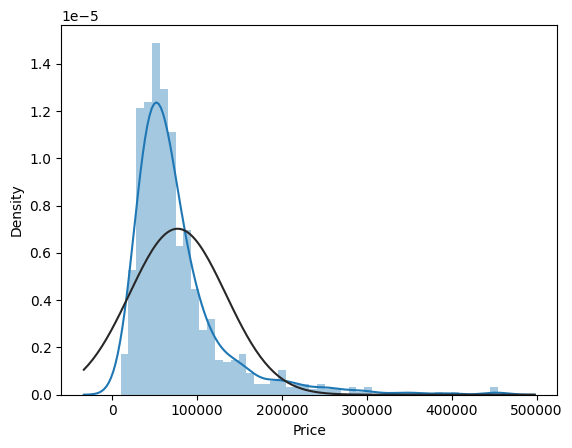

In [8]:
sns.distplot(df['Price'], fit=stats.norm) 

## Корреляции
### Метрические предикторы

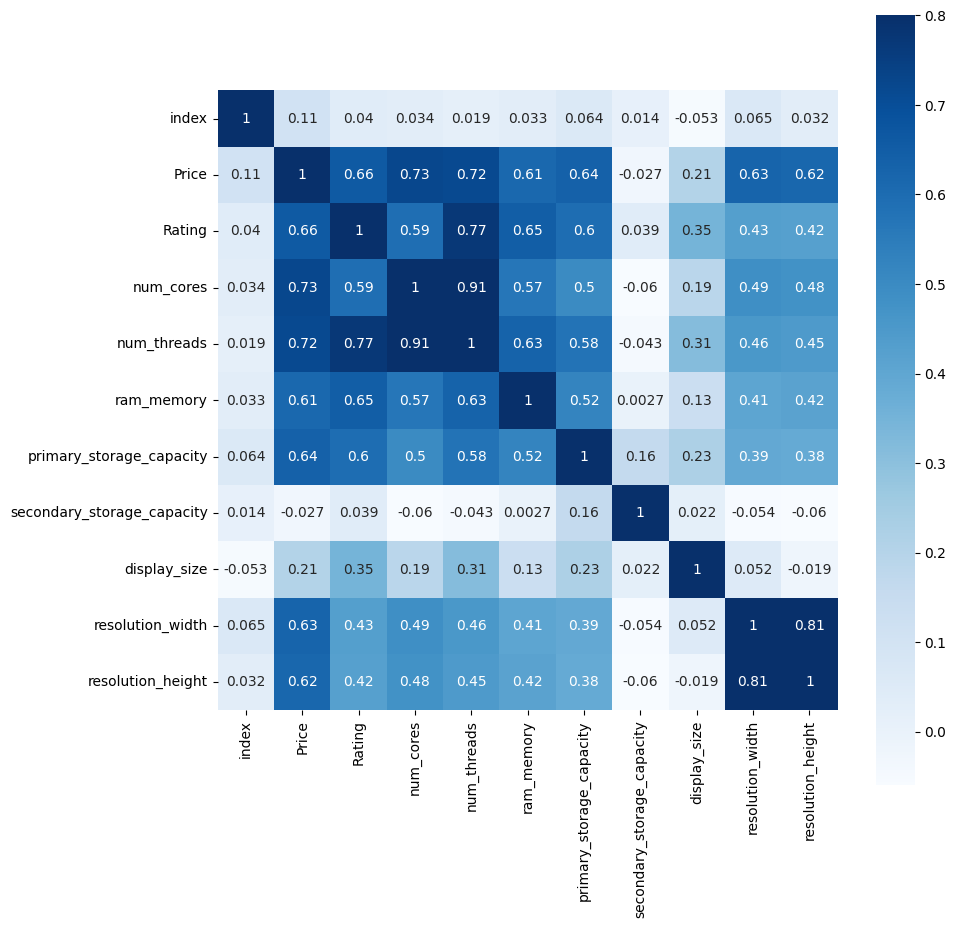

In [9]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, square=True, cmap='Blues', annot=True)
plt.show()

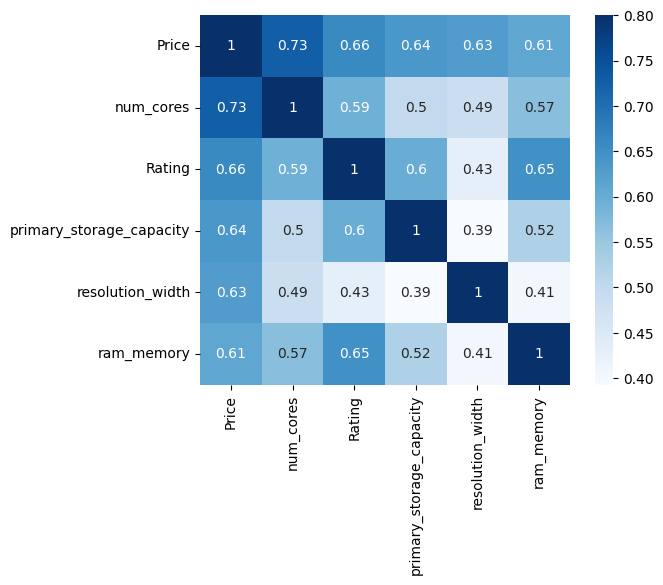

In [10]:
# num_cores сильно коррелирует с num_threads
# resolution_width сильно коррелирует с resolution_height
numerical = ['num_cores', 'Rating', 'primary_storage_capacity' ,'resolution_width', 'ram_memory']

corr2 = df[['Price'] + numerical].corr()

sns.heatmap(corr2, vmax=.8, square=True, cmap='Blues', annot=True)
plt.show()

### Категориальные предикторы

In [11]:
# Значения категорильных переменных
categorial = df.dtypes[df.dtypes == object].index.values.tolist()

categorial.remove('Model')

for cat in categorial:
    print('{} : {}\n'.format(cat, df[cat].unique()))

brand : ['tecno' 'hp' 'acer' 'lenovo' 'apple' 'infinix' 'asus' 'dell' nan 'msi'
 'ultimus' 'samsung' 'primebook' 'iball' 'zebronics' 'chuwi' 'gigabyte'
 'wings' 'jio' 'honor' 'realme' 'avita' 'microsoft' 'fujitsu' 'lg'
 'walker' 'axl']

processor_brand : ['intel' 'amd' 'apple' nan 'other']

processor_tier : ['core i3' 'core i7' 'ryzen 5' 'core i5' 'ryzen 3' 'm1' 'core i9' nan
 'ryzen 7' 'other' 'm3' 'm2' 'ryzen 9' 'celeron' 'core ultra 7' 'pentium']

primary_storage_type : ['SSD' 'HDD' nan]

secondary_storage_type : ['No secondary storage' 'SSD' nan]

gpu_brand : ['intel' 'amd' 'apple' 'nvidia' nan 'arm']

gpu_type : ['integrated' 'dedicated' 'apple' nan]

is_touch_screen : [False True nan]

OS : ['windows' 'mac' 'dos' nan 'android' 'chrome' 'other']

year_of_warranty : ['1' '2' nan 'No information' '3']



In [12]:
df['processor_brand'].value_counts()

processor_brand
intel    669
amd      244
apple     13
other      4
Name: count, dtype: int64

In [13]:
df['processor_brand_intel'] = (df['processor_brand'] == 'intel').astype(int)
df

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty,processor_brand_intel
0,1.0,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990.0,63.0,intel,core i3,2.0,4.0,NaN,...,0.0,intel,integrated,False,15.6,1920.0,1080.0,windows,1,1
1,2.0,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990.0,67.0,intel,core i7,4.0,8.0,16.0,...,0.0,intel,integrated,False,15.6,1920.0,1080.0,windows,1,1
2,3.0,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100.0,73.0,amd,ryzen 5,6.0,12.0,8.0,...,0.0,amd,dedicated,False,NaN,1920.0,1080.0,windows,1,0
3,4.0,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990.0,62.0,intel,core i5,12.0,NaN,8.0,...,0.0,intel,integrated,False,14.0,1920.0,1080.0,windows,1,1
4,5.0,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580.0,62.0,amd,ryzen 3,4.0,8.0,8.0,...,0.0,amd,integrated,False,15.6,1920.0,1080.0,windows,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,998.0,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,65990.0,68.0,amd,ryzen 5,6.0,12.0,16.0,...,0.0,nvidia,dedicated,False,15.6,1920.0,1080.0,windows,1,0
987,999.0,NaN,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,91990.0,73.0,intel,core i7,10.0,16.0,16.0,...,0.0,nvidia,NaN,False,NaN,NaN,1080.0,windows,2,1
988,1000.0,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,44990.0,59.0,amd,ryzen 5,4.0,8.0,8.0,...,0.0,amd,integrated,False,15.6,1920.0,1080.0,windows,1,0
989,NaN,asus,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,67990.0,68.0,NaN,ryzen 5,6.0,12.0,16.0,...,NaN,amd,integrated,False,14.0,2560.0,1600.0,windows,1,0


In [14]:
df['gpu_type'].value_counts()

gpu_type
integrated    593
dedicated     334
apple          14
Name: count, dtype: int64

In [15]:
df['gpu_type_integrated'] = (df['gpu_type'] == 'integrated').astype(int)
df

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty,processor_brand_intel,gpu_type_integrated
0,1.0,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990.0,63.0,intel,core i3,2.0,4.0,NaN,...,intel,integrated,False,15.6,1920.0,1080.0,windows,1,1,1
1,2.0,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990.0,67.0,intel,core i7,4.0,8.0,16.0,...,intel,integrated,False,15.6,1920.0,1080.0,windows,1,1,1
2,3.0,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100.0,73.0,amd,ryzen 5,6.0,12.0,8.0,...,amd,dedicated,False,NaN,1920.0,1080.0,windows,1,0,0
3,4.0,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990.0,62.0,intel,core i5,12.0,NaN,8.0,...,intel,integrated,False,14.0,1920.0,1080.0,windows,1,1,1
4,5.0,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580.0,62.0,amd,ryzen 3,4.0,8.0,8.0,...,amd,integrated,False,15.6,1920.0,1080.0,windows,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,998.0,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,65990.0,68.0,amd,ryzen 5,6.0,12.0,16.0,...,nvidia,dedicated,False,15.6,1920.0,1080.0,windows,1,0,0
987,999.0,NaN,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,91990.0,73.0,intel,core i7,10.0,16.0,16.0,...,nvidia,NaN,False,NaN,NaN,1080.0,windows,2,1,0
988,1000.0,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,44990.0,59.0,amd,ryzen 5,4.0,8.0,8.0,...,amd,integrated,False,15.6,1920.0,1080.0,windows,1,0,1
989,NaN,asus,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,67990.0,68.0,NaN,ryzen 5,6.0,12.0,16.0,...,amd,integrated,False,14.0,2560.0,1600.0,windows,1,0,1


## Регрессия
### Простая линейная регрессия

In [16]:
categorial = ['gpu_type_integrated', 'processor_brand_intel']

import statsmodels.api as sm
df_model1 = df.dropna(subset=['Price', 'num_cores'])
df_model1.shape

(909, 24)

In [17]:
x_simple = df_model1['num_cores']
y = df_model1['Price']
x_simple_constant = sm.add_constant(x_simple) #добавление константы в модель
model1 = sm.OLS(y, x_simple_constant).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     1010.
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          1.32e-149
Time:                        16:44:00   Log-Likelihood:                -10910.
No. Observations:                 909   AIC:                         2.182e+04
Df Residuals:                     907   BIC:                         2.183e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3809.2007   2862.565     -1.331      0.1

### Множественная линейная регрессия

In [18]:
df_model2 = df.dropna(subset = categorial + numerical + ['Price'])
y = df_model2['Price']
x_mult = df_model2[categorial + numerical]
x_mult_constant = sm.add_constant(x_mult)

model2 = sm.OLS(y, x_mult_constant).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     272.1
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          4.76e-197
Time:                        16:44:00   Log-Likelihood:                -8489.4
No. Observations:                 725   AIC:                         1.699e+04
Df Residuals:                     717   BIC:                         1.703e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [19]:
from scipy.stats.mstats import zscore
print(sm.OLS(zscore(y), zscore(x_mult)).fit().summary())
#значения стандартизированных коэффициентов можно сравнивать друг с другом
#можно определить какой из предикторов сильней взаимосвязан с зависимой переменной

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.726
Model:                            OLS   Adj. R-squared (uncentered):              0.724
Method:                 Least Squares   F-statistic:                              272.5
Date:                Tue, 03 Dec 2024   Prob (F-statistic):                   2.50e-197
Time:                        16:44:40   Log-Likelihood:                         -558.78
No. Observations:                 725   AIC:                                      1132.
Df Residuals:                     718   BIC:                                      1164.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [20]:
print('R^2 = {:f}'.format(model2.rsquared))
print('F-test significance = {:f}'.format(model2.f_pvalue))

R^2 = 0.726492
F-test significance = 0.000000


In [29]:
l = []
for (param, index) in zip(model2.params[1:], model2.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))
    
print('Y = {:2f} + {}'.format(model2.params[0], ' + '.join(l)))

Y = -92860.868775 + -16844.30*gpu_type_integrated + -4542.96*processor_brand_intel + 5074.26*num_cores + 271.66*Rating + 50.12*primary_storage_capacity + 40.48*resolution_width + 1005.84*ram_memory


Обратите внимание, что все пункты задания должны сопровождаться _выполненным_ фрагментом кода!

# Этот файл нужно сохранить как Notebook (.ipynb) и загрузить в Smart LMS до 13:00 13 ноября.